   Restaurant ID         Restaurant Name  Country Code              City  \
0        6317637        Le Petit Souffle           162       Makati City   
1        6304287        Izakaya Kikufuji           162       Makati City   
2        6300002  Heat - Edsa Shangri-La           162  Mandaluyong City   
3        6318506                    Ooma           162  Mandaluyong City   
4        6314302             Sambo Kojin           162  Mandaluyong City   

                                             Address  \
0  Third Floor, Century City Mall, Kalayaan Avenu...   
1  Little Tokyo, 2277 Chino Roces Avenue, Legaspi...   
2  Edsa Shangri-La, 1 Garden Way, Ortigas, Mandal...   
3  Third Floor, Mega Fashion Hall, SM Megamall, O...   
4  Third Floor, Mega Atrium, SM Megamall, Ortigas...   

                                     Locality  \
0   Century City Mall, Poblacion, Makati City   
1  Little Tokyo, Legaspi Village, Makati City   
2  Edsa Shangri-La, Ortigas, Mandaluyong City   
3      SM 

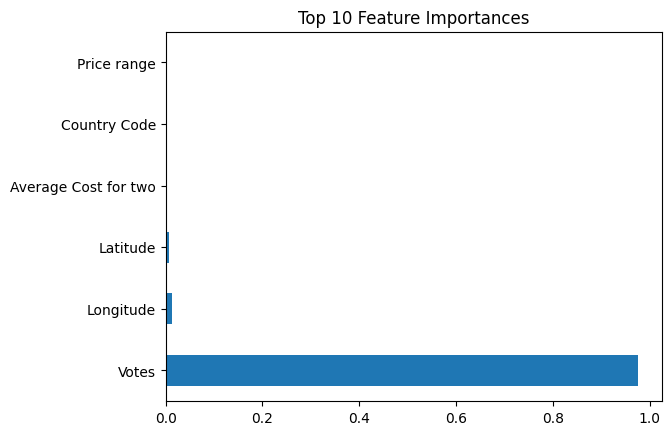

Top 10 Coefficients (Linear Regression):
Price range             5.747922e-01
Latitude                8.197520e-03
Country Code            6.235170e-03
Longitude               3.135840e-03
Votes                   6.429839e-04
Average Cost for two    6.270165e-07
dtype: float64


In [9]:
#Preprocess the Dataset(Step 1)

import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import OneHotEncoder, LabelEncoder
from sklearn.impute import SimpleImputer

# Load the dataset (replace with your file path)
df = pd.read_csv('Dataset .csv',encoding='utf-8-sig')

# Inspect the data
print(df.head())
print(df.info())
print(df.describe())

# Handle missing values
numerical_cols = ['Average Cost for two', 'Votes']  # Adjust based on your data
categorical_cols = ['City', 'Cuisines', 'Has Table booking', 'Has Online delivery', 'Is delivering now', 'Switch to order menu', 'Rating color', 'Rating text']

# Impute numerical with median
num_imputer = SimpleImputer(strategy='median')
df[numerical_cols] = num_imputer.fit_transform(df[numerical_cols])

# Impute categorical with most frequent
cat_imputer = SimpleImputer(strategy='most_frequent')
df[categorical_cols] = cat_imputer.fit_transform(df[categorical_cols])

# Encode categorical variables
# One-hot for nominal (e.g., City, Cuisines)
df = pd.get_dummies(df, columns=['City', 'Cuisines', 'Has Table booking', 'Has Online delivery', 'Is delivering now', 'Switch to order menu'], drop_first=True)

# Label encode ordinal (e.g., Price range, Rating color, Rating text)
le = LabelEncoder()
df['Price range'] = le.fit_transform(df['Price range'])
df['Rating color'] = le.fit_transform(df['Rating color'])
df['Rating text'] = le.fit_transform(df['Rating text'])

# Drop irrelevant columns (e.g., Restaurant Name if not useful)
df = df.drop(['Restaurant Name','Rating color','Rating text'], axis=1)

# Define features (X) and target (y)
X = df.select_dtypes(include=['number']).drop(['Aggregate rating','Restaurant ID'],axis=1)
y = df['Aggregate rating']

# Split into train/test (80/20)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

print(f"Training set size: {X_train.shape}")
print(f"Testing set size: {X_test.shape}")


#Selecting a Regression Algorithm and Train It (Step 2)

from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor

# Linear Regression
lr_model = LinearRegression()
lr_model.fit(X_train, y_train)

# Decision Tree Regression
dt_model = DecisionTreeRegressor(random_state=42, max_depth=10)  # Limit depth to avoid overfitting
dt_model.fit(X_train, y_train)

print("Models trained successfully.")



#Evaluating the Model Performance(Step 3)

from sklearn.metrics import mean_squared_error, r2_score

# Predictions
lr_pred = lr_model.predict(X_test)
dt_pred = dt_model.predict(X_test)

# Linear Regression Metrics
lr_mse = mean_squared_error(y_test, lr_pred)
lr_r2 = r2_score(y_test, lr_pred)

# Decision Tree Metrics
dt_mse = mean_squared_error(y_test, dt_pred)
dt_r2 = r2_score(y_test, dt_pred)

print(f"Linear Regression - MSE: {lr_mse:.4f}, R²: {lr_r2:.4f}")
print(f"Decision Tree - MSE: {dt_mse:.4f}, R²: {dt_r2:.4f}")



#Interpret the Model Results and Analyze Influential Features(Step 4)

import matplotlib.pyplot as plt

# Feature importance from Decision Tree
feature_importances = pd.Series(dt_model.feature_importances_, index=X.columns).sort_values(ascending=False)
print("Top 10 Influential Features (Decision Tree):")
print(feature_importances.head(10))

# Plot
feature_importances.head(10).plot(kind='barh')
plt.title('Top 10 Feature Importances')
plt.show()

# Linear Regression coefficients (for comparison)
lr_coeffs = pd.Series(lr_model.coef_, index=X.columns).sort_values(ascending=False)
print("Top 10 Coefficients (Linear Regression):")
print(lr_coeffs.head(10))